Assignment

ให้ใช้ข้อมูล Mall Customer ในการทำ clustering โดยให้ตอบคำถามต่อไปนี้

1. ข้อมูล Mall Customer ควรมีกี่กลุ่ม

2. ลูกค้าแต่ละกลุ่ม ตามที่แบ่งได้ในข้อ 1 มีลักษณะอย่างไร

Import Libraries:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


โหลดข้อมูล

In [ ]:
import pandas as pd
Mall_Customers = pd.read_csv('/content/drive/My Drive/Data_science/Cluster_K-means/Mall_Customers.csv')
Mall_Customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
Mall_Customers = pd.DataFrame(Mall_Customers)
#แปลง Word ของ Gender เป็น Male = 1 , Female = 2
mapping = {'Male': 1, 'Female': 2}
Mall_Customers['Gender'] = Mall_Customers['Gender'] .map(mapping)
Mall_Customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40
...,...,...,...,...,...
195,196,2,35,120,79
196,197,2,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

เลือก Feature: ที่จะใช้ในการ clustering

In [ ]:
features = Mall_Customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
features

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Scale ข้อมูล

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

หาจำนวน Cluster ที่เหมาะสม (K) โดยใช้  Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

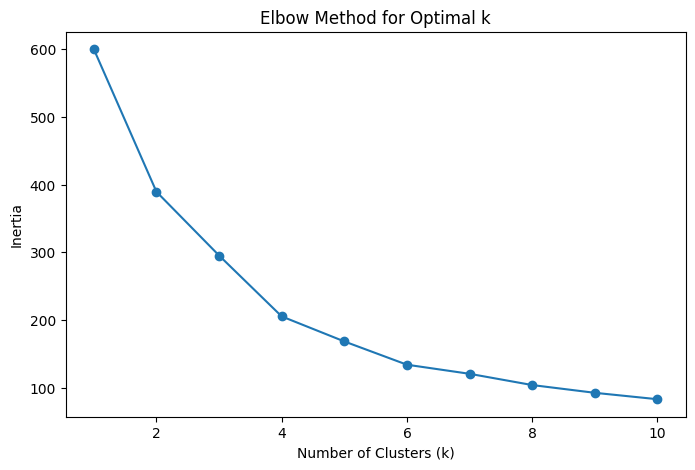

In [ ]:
# ทดลอง K ตั้งแต่ 1 ถึง 10
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# พล็อต Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


จุด elbow บนกราฟ อยู่ที่ k = 4
จำนวน clusters ที่เหมาะสม: k = 3

Make_Blob เป็นฟังก์ชันสร้างชุดข้อมูลสังเคราะห์สำหรับ clustering

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, Y = make_blobs(n_samples=200, centers=3 , n_features=3 ,random_state=10,cluster_std=1,)

Note

n_samples: จำนวนข้อมูล (samples) ทั้งหมดที่ต้องการสร้าง

centers: จำนวนของ clusters ที่ต้องการสร้าง

n_features: จำนวนของ features หรือตัวแปรที่ต้องการสร้าง

random_state: ให้ผลลัพธ์ที่สามารถทำซ้ำได้

cluster_std: ความแปรปรวน (standard deviation) ของ clusters

In [ ]:
Y.shape

(200,)

In [ ]:
Y

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2,
       0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0,
       2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2,
       0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1,
       0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0,
       1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0,
       2, 1])

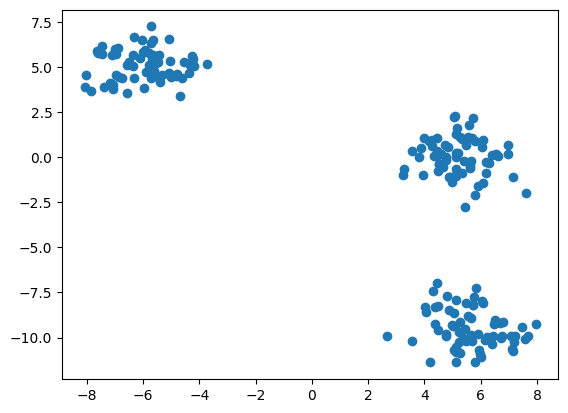

In [ ]:
plt.plot(X[:,0],X[:,1],'o')

Fit และ Predict:ใช้ KMeans

In [ ]:
# Model Construction Import model ใช้ cluster โดยโมเดล KMeans
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=3,init='random')

In [ ]:
# เลือกจำนวน clusters ตามจุด elbow
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
predicted_clusters = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
kmeans.fit(X);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Attributes of Kmeans Model #เรียกดูค่า center
kmeans.cluster_centers_

array([[ 5.64008   , -9.49291549,  2.64511221],
       [-5.93156003,  5.10325853, -6.71113711],
       [ 5.19179233,  0.02781349, -5.35385049]])

In [ ]:
kmeans.labels_   #บอกข้อมูลแต่ละตัวอยู่กลุ่มไหน

array([2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1,
       0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2,
       0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0,
       2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0,
       1, 2], dtype=int32)

In [ ]:
kmeans.inertia_

584.6945336855943

In [ ]:
kmeans.n_iter_

2

Visualize ผลลัพธ์

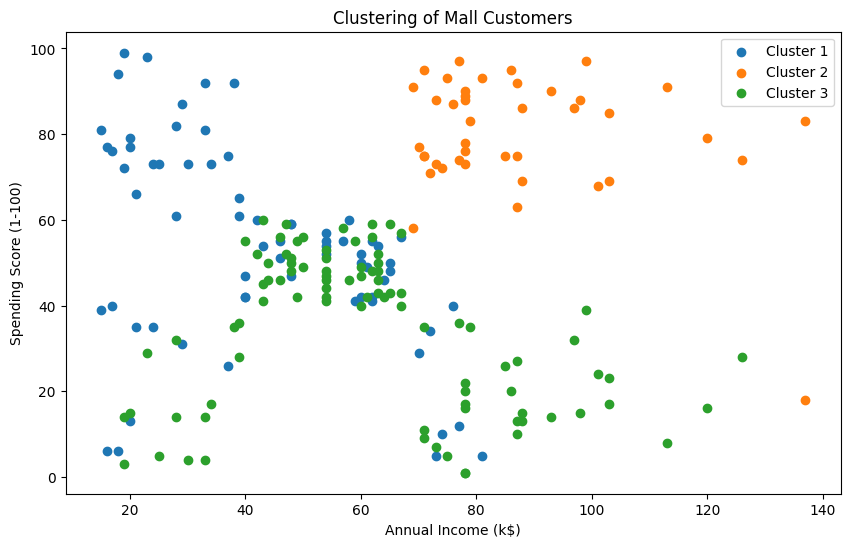

In [ ]:
# เพิ่ม cluster labels เข้าไปใน DataFrame
Mall_Customers['Cluster'] = predicted_clusters

# พล็อต scatter plot ของ 'Annual Income' และ 'Spending Score' แบ่งตาม cluster
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = Mall_Customers[Mall_Customers['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster + 1}')

plt.title('Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Model Deployment

In [ ]:
kmeans.predict(X) # Predict

array([2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1,
       0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2,
       0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0,
       2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0,
       1, 2], dtype=int32)

In [ ]:
kmeans.transform(X) #transform บอกระยะทางจากตัวข้อมูลกับ center

array([[14.19640291, 11.4186914 ,  2.21674485],
       [11.00064939, 14.08628576,  2.9891497 ],
       [20.55291111,  1.53930869, 11.25198244],
       [20.77296024,  1.05384094, 11.6816892 ],
       [20.57881763,  1.67788962, 12.97508719],
       [11.5760956 , 11.17970077,  2.26005946],
       [ 0.75911379, 21.14620953, 12.83523073],
       [20.54719079,  1.76672735, 12.82675954],
       [19.95652097,  2.33762451, 12.81656917],
       [20.32681595,  1.06692022, 11.42817612],
       [12.17599614, 12.03875607,  0.79155246],
       [21.79322386,  2.85083899, 13.85457292],
       [14.02652843, 12.11990254,  2.2327387 ],
       [12.14932897, 12.50609345,  1.35364769],
       [ 1.931123  , 22.05590594, 13.62338044],
       [ 2.53672538, 21.14761683, 11.71873464],
       [12.48632701, 12.63166668,  1.50490694],
       [ 0.49325733, 20.99343968, 12.54541656],
       [13.28204274, 13.81427227,  2.04486806],
       [12.4308044 , 13.5157444 ,  1.62921567],
       [ 1.58471452, 20.02170878, 11.290

In [ ]:
kmeans.score(X) #opposite sign of E2 error , nint=escore

-584.6945336855943

In [ ]:
kmeans.transform(X)

array([[14.19640291, 11.4186914 ,  2.21674485],
       [11.00064939, 14.08628576,  2.9891497 ],
       [20.55291111,  1.53930869, 11.25198244],
       [20.77296024,  1.05384094, 11.6816892 ],
       [20.57881763,  1.67788962, 12.97508719],
       [11.5760956 , 11.17970077,  2.26005946],
       [ 0.75911379, 21.14620953, 12.83523073],
       [20.54719079,  1.76672735, 12.82675954],
       [19.95652097,  2.33762451, 12.81656917],
       [20.32681595,  1.06692022, 11.42817612],
       [12.17599614, 12.03875607,  0.79155246],
       [21.79322386,  2.85083899, 13.85457292],
       [14.02652843, 12.11990254,  2.2327387 ],
       [12.14932897, 12.50609345,  1.35364769],
       [ 1.931123  , 22.05590594, 13.62338044],
       [ 2.53672538, 21.14761683, 11.71873464],
       [12.48632701, 12.63166668,  1.50490694],
       [ 0.49325733, 20.99343968, 12.54541656],
       [13.28204274, 13.81427227,  2.04486806],
       [12.4308044 , 13.5157444 ,  1.62921567],
       [ 1.58471452, 20.02170878, 11.290

Find Number of Cluster

In [ ]:
#Square Error หากลุ่มข้อมูล
K = range(2,15)
list(K)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
K=range(2,15) #ค่า K = 2 ถึง 15 : แบ่งกลุ่มทดลอง
E2=[]
for k in K:
    model=KMeans(n_clusters=k)  #inertia
    model=model.fit(X)          #แบ่งกลุ่มแต่ละรอบ
    E2.append(model.inertia_)   #หาค่าเฉลี่ยแต่ละกลุ่ม
    #เก็บค่าไว้ใน list  E2[]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

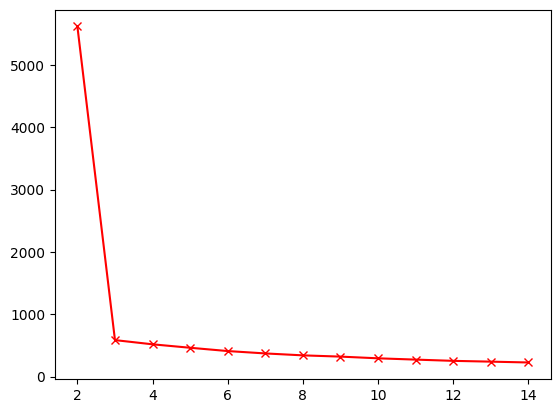

In [ ]:
plt.plot(K,E2,'rx-') #ค้นหากลุ่มโดยการ plot

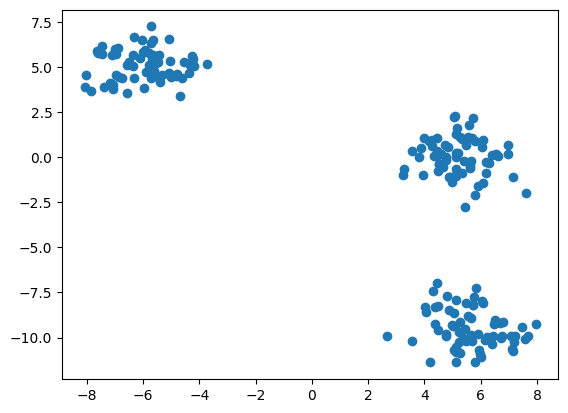

In [ ]:
# Scatter plot
plt.plot(X[:,0],X[:,1],'o')

In [ ]:
MX1=kmeans.cluster_centers_[:,0]
MX2=kmeans.cluster_centers_[:,1]

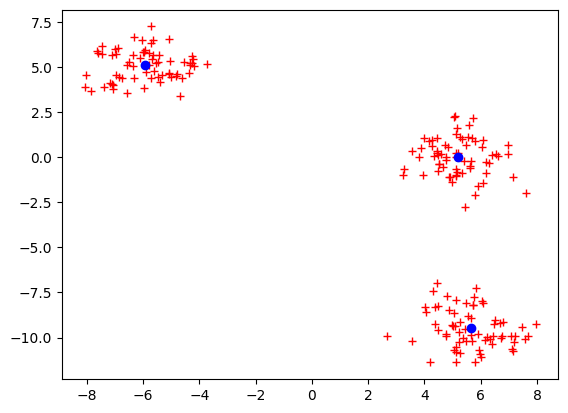

In [ ]:
#plt.plot(X[:,0],X[:,1],'+r',MX1,MX2,'ob') #จุดสีน้ำเงินคือจุด center ของแต่ละกลุ่ม
plt.plot(X[:,0],X[:,1],'+r')
plt.plot(MX1,MX2,'ob')

In [ ]:
y_kmeans = kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score เป็นค่าที่ใช้วัดว่าจุดข้อมูลแต่ละจุดในชุดข้อมูล อยู่ใน cluster ที่เหมาะสมหรือไม่

โดยวัดจากค่าเฉลี่ยของระยะทางภายใน cluster (intra-cluster distance) เทียบกับค่าเฉลี่ยของระยะทางระหว่าง cluster (inter-cluster distance)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sc = []

kmeans_kwargs = {            #kmeans_kwargs เป็นพารามิเตอร์ที่ใช้ในการสร้าง KMeans model
    "init": "random",        #ใช้วิธี 'random' ในการเลือกตำแหน่งเริ่มต้นของ centroids
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

K=range(2,15)
for k in K:
  model = KMeans(n_clusters=k, **kmeans_kwargs) #ในลูป for k in K, สร้าง KMeans model ด้วยจำนวนกลุ่มเท่ากับ k โดยใช้พารามิเตอร์จาก kmeans_kwargs
  #model = KMeans(n_clusters=k)
  model.fit(scaled_features)                    # จากนั้นทำการ fit กับข้อมูล scaled_features
  score = silhouette_score(scaled_features, model.labels_) #เปลี่ยนตรงนี้ คำนวณ silhouette score
  sc.append(score)                              # เก็บค่านั้นในลิสต์ sc
sc

[0.33547192894004574,
 0.357793388710272,
 0.4039582785148566,
 0.41664341513732767,
 0.42742814991580175,
 0.417231894954916,
 0.40694842797445224,
 0.41943835582521516,
 0.4059430497836466,
 0.4034448004933976,
 0.37585975662314347,
 0.38271423901564355,
 0.35861611386981734]

Text(0.5, 0, 'K')

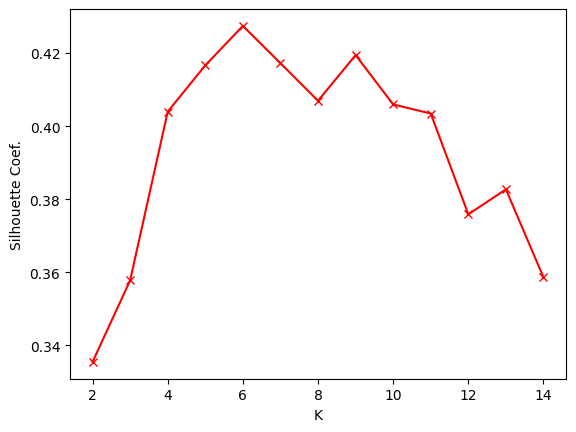

In [ ]:
plt.plot(K,sc,'rx-')
plt.ylabel('Silhouette Coef.')
plt.xlabel('K')

Explore Clustered Data

In [ ]:
num_cluster=3  #มี 3 กลุ่ม ที่ได้จากการทำข้างต้น
kmeans_kwargs = {
    "init": "k-means++",    #ใช้วิธี k-means++ ในการเลือกตำแหน่งเริ่มต้นของ centroids ลดความเสี่ยงของการติดตาม local minimum
    "n_init": 10,           #ทำการทดลองทดสอบการเริ่มต้น centroids 10 ครั้ง เพื่อเลือกตำแหน่งเริ่มต้นที่ดีที่สุด
    "max_iter": 300,        #จำนวนการทำซ้ำสูงสุดที่ KMeans algorithm จะทำการ converge
    "random_state": 42,
    "n_clusters":num_cluster # จำนวนกลุ่มที่ใช้ในการ clustering
    }

In [ ]:
#kmeans_model=KMeans(n_clusters=num_cluster,**kmeans_kwargs)
kmeans_model=KMeans(**kmeans_kwargs)
pred_cluster=kmeans_model.fit_predict(scaled_features);

In [ ]:
pred_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1], dtype=int32)

In [ ]:
Cluster_data = pd.DataFrame({
    'x1': X[:,0],                       #'x1' และ 'x2': คอลัมน์เหล่านี้เก็บข้อมูลจาก Feature 1 และ Feature 2 ตามลำดับ
    'x2': X[:,1],
    'cluster_id': pred_cluster,         #คอลัมน์นี้เก็บข้อมูลเกี่ยวกับกลุ่มที่ได้จากการ clustering
    #'kmeans_id': kmeans_model.labels_  #คอลัมน์นี้เก็บข้อมูลรหัสกลุ่มที่ได้จาก K-means model
})
Cluster_data

,x1,x2,cluster_id
0,5.034879,2.238822,0
1,6.601625,0.063418,0
2,-4.556415,5.268299,0
3,-5.047335,5.325543,0
4,-7.114479,4.066448,0
...,...,...,...
195,3.553639,0.351067,1
196,5.217546,-10.271157,2
197,4.016544,-8.332562,1
198,-7.094375,5.653258,1


mean ทำการคำนวณค่าเฉลี่ยของข้อมูลในแต่ละกลุ่ม โดยสร้าง DataFrame ใหม่ที่เก็บค่าเฉลี่ยของทุกคอลัมน์สำหรับแต่ละกลุ่ม

Cluster_data ตามคอลัมน์ 'cluster_id'. นั่นคือ,ข้อมูลจะถูกแบ่งเป็นกลุ่มตามค่าที่อยู่ในคอลัมน์ 'cluster_id'

Cluster_data.groupby(['cluster_id']): จัดกลุ่มข้อมูลใน DataFrame

In [ ]:
cluster_centroid=Cluster_data.groupby(['cluster_id']).mean()

In [ ]:
cluster_centroid

,x1,x2
cluster_id,,
0,1.481594,-1.012540
1,1.712268,-2.888076
2,1.794518,-1.209702


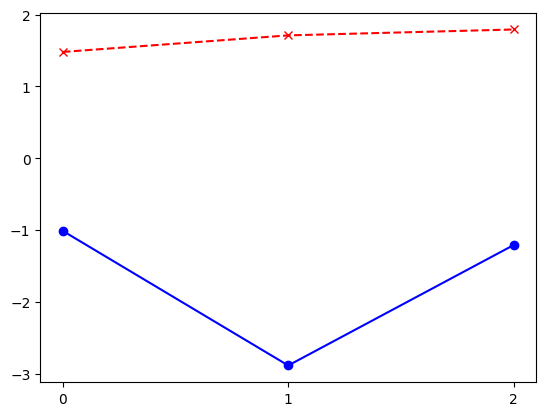

In [ ]:
plt.plot(range(num_cluster),cluster_centroid['x1'],'r--x')
plt.plot(range(num_cluster),cluster_centroid['x2'],'b-o')
plt.xticks(ticks=range(num_cluster));

##2.ลูกค้าแต่ละกลุ่ม ตามที่แบ่งได้ในข้อ 1 มีลักษณะอย่างไร

Cluster 0 สกัดข้อมูลเพื่อนำมาวิเคราะห์หา info ของกลุ่ม 0

Text(0.5, 1.0, 'cluster 0')

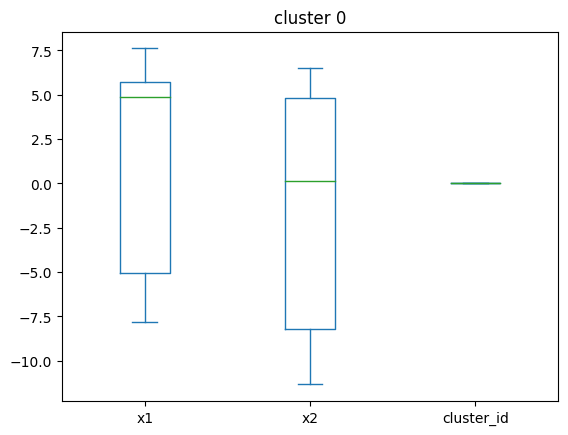

In [ ]:
Cluster_data[Cluster_data['cluster_id']==0].plot(kind='box')
plt.title('cluster 0')

In [ ]:
Cluster_data[Cluster_data['cluster_id']==0].describe()

,x1,x2,cluster_id
count,68.000000,68.000000,68.0
mean,1.481594,-1.012540,0.0
std,5.605222,6.198133,0.0
min,-7.846659,-11.343946,0.0
25%,-5.053274,-8.248875,0.0
50%,4.899262,0.130323,0.0
75%,5.730782,4.805599,0.0
max,7.617927,6.492240,0.0


จากจำนวนลูกค้าทั้งหมด 300 คน มีกลุ่มลูกค้า กลุ่มที่ 0 จำนวน 68 คน

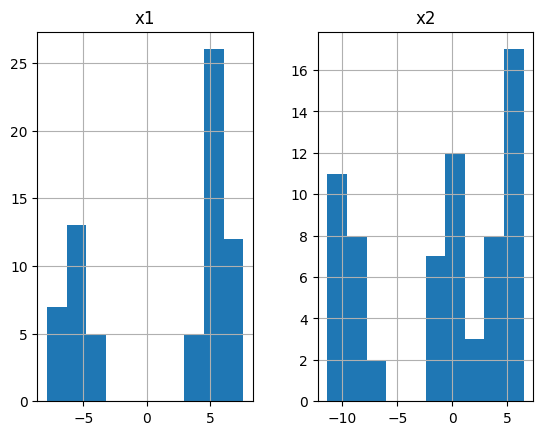

In [ ]:
Cluster_data[Cluster_data['cluster_id']==0].hist(['x1','x2']);

Cluster 1

Text(0.5, 1.0, 'cluster 1')

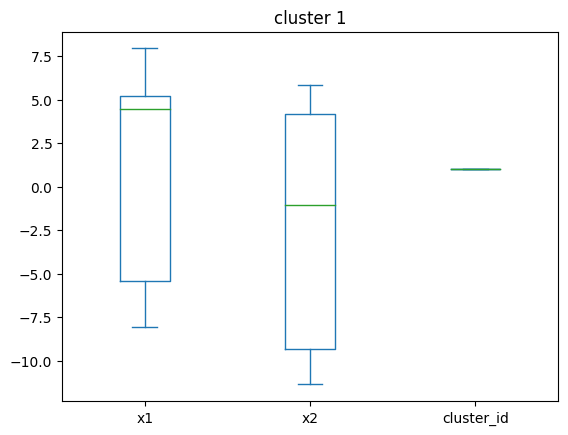

In [ ]:
Cluster_data[Cluster_data['cluster_id']==1].plot(kind='box')
plt.title('cluster 1')

In [ ]:
Cluster_data[Cluster_data['cluster_id']==1].describe()

,x1,x2,cluster_id
count,41.000000,41.000000,41.0
mean,1.712268,-2.888076,1.0
std,5.527428,6.422480,0.0
min,-8.072357,-11.361409,1.0
25%,-5.394114,-9.344028,1.0
50%,4.475881,-1.053909,1.0
75%,5.194793,4.202628,1.0
max,7.949718,5.839037,1.0


จากจำนวนลูกค้าทั้งหมด 300 คน มีกลุ่มลูกค้า กลุ่มที่ 1 จำนวน 41 คน

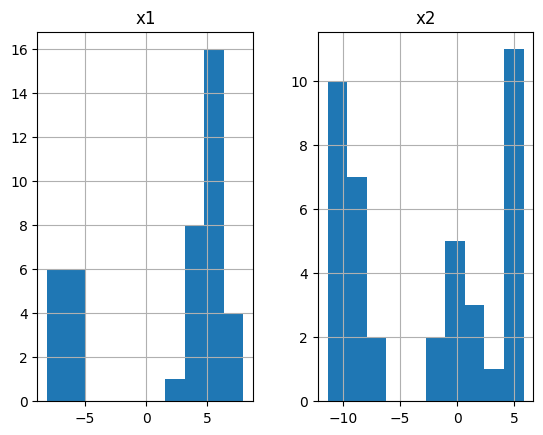

In [ ]:
Cluster_data[Cluster_data['cluster_id']==1].hist(['x1','x2']);

Cluster 2

Text(0.5, 1.0, 'cluster 2')

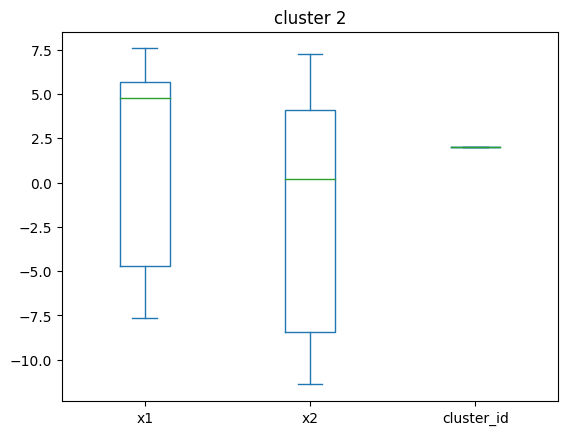

In [ ]:
Cluster_data[Cluster_data['cluster_id']==2].plot(kind='box')
plt.title('cluster 2')

In [ ]:
Cluster_data[Cluster_data['cluster_id']==2].describe()

,x1,x2,cluster_id
count,91.000000,91.000000,91.0
mean,1.794518,-1.209702,2.0
std,5.349572,5.945599,0.0
min,-7.619338,-11.383534,2.0
25%,-4.725354,-8.454092,2.0
50%,4.778301,0.205980,2.0
75%,5.663013,4.066525,2.0
max,7.568218,7.261826,2.0


จากจำนวนลูกค้าทั้งหมด 300 คน มีกลุ่มลูกค้า กลุ่มที่ 2 จำนวน 91 คน

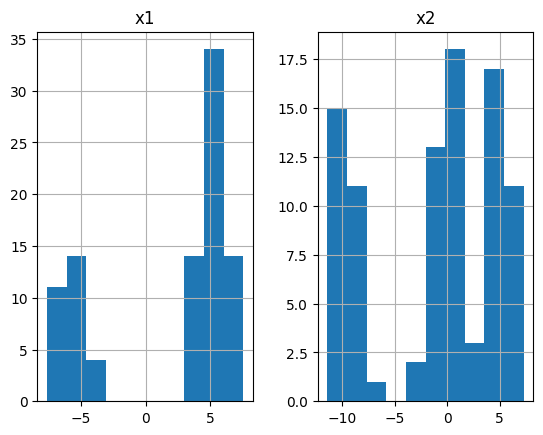

In [ ]:
Cluster_data[Cluster_data['cluster_id']==2].hist(['x1','x2']);

จากลูกค้าทั้งหมด 200 คน มีลูกค้าแบ่งได้ทั้งหมดจำนวน 3 กลุ่ม

โดยกลุ่มที่มีจำนวนลูกค้ามากที่สุดคือ  กลุ่มที่ 0 จำนวน 68 คน

รองลงมาคือ  กลุ่มที่ 1 จำนวน  41 คน และสุดท้าย  

กลุ่มที่  2 จำนวน 91 คน

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

Mall_Customers = pd.DataFrame(Mall_Customers)
# กำหนดจำนวน cluster
n_clusters = 3

#แปลง Word ของ Gender เป็น Male = 1 , Female = 2
mapping = {'Male': 1, 'Female': 2}
Mall_Customers['Gender'] = Mall_Customers['Gender'] .map(mapping)

# ทำ clustering ด้วย K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
Mall_Customers['Cluster'] = kmeans.fit_predict(X)

# แสดงผลลัพธ์
Mall_Customers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,NaN,19,15,39,2
1,2,NaN,21,15,81,2
2,3,NaN,20,16,6,1
3,4,NaN,23,16,77,1
4,5,NaN,31,17,40,1
...,...,...,...,...,...,...
195,196,NaN,35,120,79,2
196,197,NaN,45,126,28,0
197,198,NaN,32,126,74,0
198,199,NaN,32,137,18,1
